# 1. Prepare the dataset

In [70]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3 - FEATURE ENGINEERING
import string #punctuation
import nltk #English language stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import re
import spacy
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /home/patricia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patricia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
file_path = '/home/patricia/code/ChristineSi/neuroCraft/raw_data/CLEAR Corpus 6.01 - CLEAR Corpus 6.01.csv'
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)
# Display the DataFrame
df.head()


ID  Last Changed            Author  \
0  400           NaN     Carolyn Wells   
1  401           NaN     Carolyn Wells   
2  402           NaN     Carolyn Wells   
3  403           NaN  CHARLES KINGSLEY   
4  404           NaN  Charles Kingsley   

                                               Title  \
0                                    Patty's Suitors   
1                      Two Little Women on a Holiday   
2                                      Patty Blossom   
3     THE WATER-BABIES\nA Fairy Tale for a Land-Baby   
4  HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...   

                                           Anthology  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  The Heroes\n       or Greek Fairy Tales for my...   

                                                 URL     Source  Pub Year  \
0  http://www.gutenberg.org/cache/epub/5631/pg563...  gutenberg    1914.0   
1  http://www.gutenberg.org/cache/epub/5893/pg589...  gutenberg    1917.0   
2  http://www.gutenberg.org/cache/epub/20945/pg20...  gutenberg    1917.0   
3  http://www.gutenberg.org/files/25564/25564-h/2...  gutenberg    1863.0   
4  http://www.gutenberg.org/files/677/677-h/677-h...  gutenberg    1889.0   

  Category Location  ...  CAREC_M     CARES     CML2RI  firstPlace_pred  \
0      Lit      mid  ...  0.11952  0.457534  12.097815        -0.383831   
1      Lit      mid  ...  0.04921  0.462510  22.550179        -0.260307   
2      Lit      mid  ...  0.09724  0.369259  18.125279        -0.615037   
3      Lit      mid  ...  0.08856  0.390759  10.959460        -1.528806   
4      Lit      mid  ...  0.08798  0.389226   3.195960        -1.335586   

  secondPlace_pred  thirdPlace_pred  fourthPlace_pred  fifthPlace_pred  \
0        -0.283604        -0.346879         -0.281620        -0.247767   
1        -0.209960        -0.061565         -0.234231        -0.201347   
2        -0.530600        -0.527847         -0.550180        -0.565762   
3        -1.525546        -1.471455         -1.265776        -1.422547   
4        -1.321922        -1.163985         -1.122501        -1.185518   

  sixthPlace_pred  Kaggle split  
0       -0.289945         Train  
1       -0.156156         Train  
2       -0.538852         Train  
3       -1.393155          Test  
4       -1.271324         Train  

[5 rows x 40 columns]

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724 entries, 0 to 4723
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  4724 non-null   int64  
 1   Last Changed                        139 non-null    float64
 2   Author                              4724 non-null   object 
 3   Title                               4724 non-null   object 
 4   Anthology                           2712 non-null   object 
 5   URL                                 4724 non-null   object 
 6   Source                              4724 non-null   object 
 7   Pub Year                            4715 non-null   float64
 8   Category                            4724 non-null   object 
 9   Location                            4724 non-null   object 
 10  License                             4724 non-null   object 
 11  MPAA
Max                            4724 no

In [4]:
df.columns


Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')

In [5]:
columns_to_drop = ['Last Changed', 'Anthology', 'URL', 'License','MPAA \n#Max', 'MPAA\n#Avg',
                   'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
                   'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head()


ID            Author                                              Title  \
0  400     Carolyn Wells                                    Patty's Suitors   
1  401     Carolyn Wells                      Two Little Women on a Holiday   
2  402     Carolyn Wells                                      Patty Blossom   
3  403  CHARLES KINGSLEY     THE WATER-BABIES\nA Fairy Tale for a Land-Baby   
4  404  Charles Kingsley  HOW THE ARGONAUTS WERE DRIVEN INTO THE UNKNOWN...   

      Source  Pub Year Category Location MPAA\nMax  \
0  gutenberg    1914.0      Lit      mid         G   
1  gutenberg    1917.0      Lit      mid        PG   
2  gutenberg    1917.0      Lit      mid        PG   
3  gutenberg    1863.0      Lit      mid     PG-13   
4  gutenberg    1889.0      Lit      mid        PG   

                                             Excerpt  Google\nWC  ...  \
0  When the young people returned to the ballroom...         174  ...   
1  All through dinner time, Mrs. Fayre was somewh...         164  ...   
2  As Roger had predicted, the snow departed as q...         162  ...   
3  Mr. Grimes was to come up next morning to Sir ...         159  ...   
4  And outside before the palace a great garden w...         163  ...   

   Flesch-Reading-Ease  Flesch-Kincaid-Grade-Level  \
0                81.70                        5.95   
1                80.26                        4.86   
2                79.04                        6.03   
3                44.77                       20.51   
4                68.07                       12.06   

  Automated Readability Index  SMOG Readability  \
0                        7.37               8.0   
1                        4.16               7.0   
2                        5.81               9.0   
3                       24.87              12.0   
4                       15.47               8.0   

   New Dale-Chall Readability Formula    CAREC  CAREC_M     CARES     CML2RI  \
0                                6.55  0.12102  0.11952  0.457534  12.097815   
1                                6.25  0.04921  0.04921  0.462510  22.550179   
2                                7.31  0.10172  0.09724  0.369259  18.125279   
3                                8.56  0.07491  0.08856  0.390759  10.959460   
4                                7.00  0.06356  0.08798  0.389226   3.195960   

   Kaggle split  
0         Train  
1         Train  
2         Train  
3          Test  
4         Train  

[5 rows x 28 columns]

In [6]:
#pip install ydata-profiling
# pip install ipywidgets
#import numpy as np
#from ydata_profiling import ProfileReport


In [7]:
#profile = ProfileReport(df, title="Profiling Report")
#profile.to_widgets()    #it takes 3-4 min


In [8]:
# Save the profile report as an HTML file
#profile.to_file("profile_report.html")


## Check for missing values

In [9]:
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index

print(f"Columns with missing values: {columns_with_missing_values}")


Columns with missing values: Index(['Pub Year', 'British Words'], dtype='object')


In [10]:
# Filter columns with missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]
# Print columns and their respective counts of missing values
for column in columns_with_missing_values.index:
    count = columns_with_missing_values[column]
    print(f"Column '{column}': {count} missing values")


Column 'Pub Year': 9 missing values
Column 'British Words': 4280 missing values


We don't have British Words on each text fragment. We decide to drop this column.

In [11]:
df.drop(columns=['British Words'])
# Verify that the column has been dropped
print("Columns after dropping 'British Words':", df.columns)


Columns after dropping 'British Words': Index(['ID', 'Author', 'Title', 'Source', 'Pub Year', 'Category', 'Location',
       'MPAA\nMax', 'Excerpt', 'Google\nWC', 'Joon\nWC v1', 'British WC',
       'British Words', 'Sentence\nCount v1', 'Sentence\nCount v2',
       'Paragraphs', 'BT Easiness', 'BT s.e.', 'Flesch-Reading-Ease',
       'Flesch-Kincaid-Grade-Level', 'Automated Readability Index',
       'SMOG Readability', 'New Dale-Chall Readability Formula', 'CAREC',
       'CAREC_M', 'CARES', 'CML2RI', 'Kaggle split'],
      dtype='object')


## Check for duplicates

In [12]:
#Let's check the duplicates (profile reports says 0 duplicated rows)
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicate rows
if duplicate_rows.shape[0] == 0:
    print("There are no duplicate rows in the DataFrame.")
else:
    print(f"There are {duplicate_rows.shape[0]} duplicate rows in the DataFrame.")


There are no duplicate rows in the DataFrame.


Let's explore the numeric, text and categorical variables:

In [13]:
numeric_variables = df.select_dtypes(include=['number'])

# Explore summary statistics for numeric variables
numeric_summary = numeric_variables.describe()
print("Summary statistics for numeric variables:")
print(numeric_summary)


Summary statistics for numeric variables:
                ID     Pub Year   Google\nWC  Joon\nWC v1   British WC  \
count  4724.000000  4715.000000  4724.000000  4724.000000  4724.000000   
mean   4366.347163  1937.886957   171.960203   176.925487     0.129340   
std    1896.363710    60.506795    16.988921    18.173592     0.471049   
min     400.000000  1728.000000   125.000000   135.000000     0.000000   
25%    2769.750000  1884.000000   158.000000   162.000000     0.000000   
50%    4483.500000  1915.000000   174.000000   178.000000     0.000000   
75%    5939.250000  2016.000000   186.000000   191.000000     0.000000   
max    8031.000000  2020.000000   205.000000   220.000000     9.000000   

       Sentence\nCount v1  Sentence\nCount v2   Paragraphs  BT Easiness  \
count         4724.000000         4724.000000  4724.000000  4724.000000   
mean             9.570703            9.752329     2.542337    -0.957639   
std              4.640162            4.681339     1.866298     1.0

Pub Year: 1728-2020\
Google WC, Joon WC v1, British WC: word counts from different sources


## Check for outliers

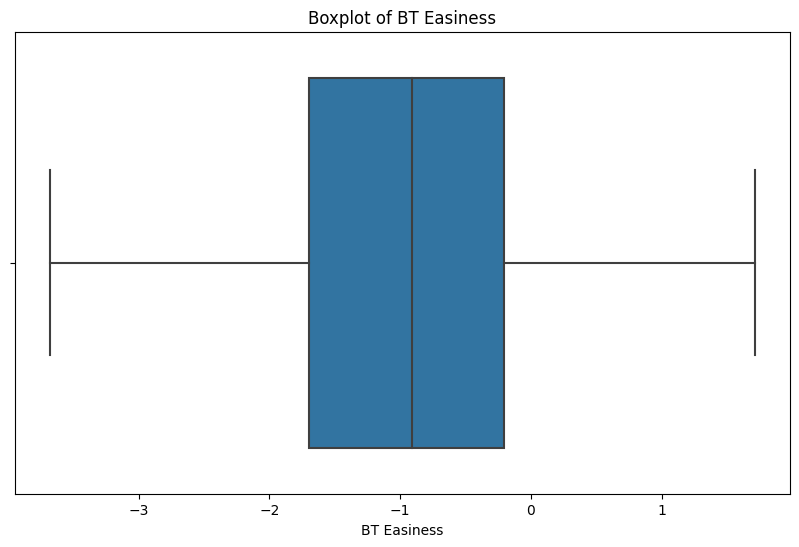

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add this line to enable inline plotting in Jupyter/IPython
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.boxplot(x='BT Easiness', data=df)
plt.title('Boxplot of BT Easiness')
plt.show()


In [15]:
text_variables = df.select_dtypes(include=['object'])

# Explore unique values and word frequency for text variables
for column in text_variables.columns:
    unique_values = text_variables[column].unique()
    word_frequency = text_variables[column].str.split().explode().value_counts()

    print(f"Column: {column}")
    print("Unique values:", unique_values)
    print("Word frequency:")
    print(word_frequency)
    print("\n")


Column: Author
Unique values: ['Carolyn Wells' 'CHARLES KINGSLEY' 'Charles Kingsley' ...
 'original text by Steve Whitt\nadapted by Jessica Fries-Gaither'
 'Stephen Whitt' 'wikijunior']
Word frequency:
Author
wiki         275
simple       275
wikipedia    274
?            271
&            173
            ... 
Happy          1
Kwamie         1
Ofori          1
Da             1
Mhlophe        1
Name: count, Length: 4848, dtype: int64


Column: Title
Unique values: ["Patty's Suitors" 'Two Little Women on a Holiday' 'Patty Blossom' ...
 'Bugs/Black Widow' 'Solids' 'Anials']
Word frequency:
Title
The          946
the          777
THE          752
of           729
and          454
            ... 
Herd           1
Pet            1
rooster        1
Fireflies      1
Anials         1
Name: count, Length: 8467, dtype: int64


Column: Source
Unique values: ['gutenberg' 'simple.wikipedia' 'kids.frontiersin' 'wikipedia'
 'africanstorybook' 'ck12' 'freekidsbooks' 'commonlit' 'emedia.uen.org'
 'digit

What should we do to handle the class imbalace? (Source and MPAA Max Values)

# 2. Feature Engineering

## Identify features that are known to impact readability for individuals with dislexia

- Left align text, without justification.
- Short simple sentences (60-70 characters).
- Use active rather than passive voice.
- Be concise; avoid using long, dense paragraphs.
- Write in simple clear language using every day words.
- Avoid double negatives.
- Avoid abbreviations where possible; always provide the expanded form when first used.

https://www.bdadyslexia.org.uk/advice/employers/creating-a-dyslexia-friendly-workplace/dyslexia-friendly-style-guide#:~:text=Font%20size%20should%20be%2012,excessive%20it%20can%20reduce%20readability.

- Avoid double spacing after dots (https://en.wikipedia.org/wiki/Sentence_spacing#cite_note-114)

Classification of words in EASY and HARD, based on:
https://www.irjet.net/archives/V8/i4/PIT/ICIETET-15.pdf
- Lenght of the words
- Count of vowels
- Mirror letters --> some people do that some people don't
- Frequency of the words

1. Text-Based Features:\
  1.1. Word Count: Total number of words in each excerpt.\
  1.2. Unique Word Count: Count of distinct words in each excerpt.\
  1.3. Average Word Length: Average length of words in each excerpt.\
  1.4. Sentence Count: Utilize the existing sentence count features.
  
2. Complexity Features:\
  2.1. Average Syllables per Word: You've already started working on this.\
  2.2. Average Vowels per Word: You've implemented this as well.\
  2.3. Punctuation Count: Total number of punctuation marks.

3. Frequency-Based Features:\
  3.1. Word Frequency: Focus on meaningful words, consider filtering out common English stopwords.\
  3.2. Rare Words Count: Count of words with low frequency.
  
4. Structural Features:\
  4.1. Paragraph Count: already in the dataset. The number of paragraphs in each excerpt.\
  4.2. Average Characters per Sentence.
  4.3. Number of Characters per excerpt

5. Metadata Features:\
  5.1. Author: Extract features related to the author, such as the number of works by each author.

6. Statistical Features:\
  6.1. Standard Deviation of Word Length: Measure of word length variability.\
  6.2. Variability in Sentence Length: Standard deviation or coefficient of variation in sentence lengths.
  
7. Domain-Specific Features:\
  7.1. Readability Scores: Utilize existing readability metrics.\
  7.2. Subjectivity/Polarity: If applicable, analyze the sentiment of the text. --> DIFFICULT OR USELESS FOR US

8. Temporal Features:\
  8.1. Decade of Publication: Categorize publication years into decades.

9. Interaction Features:\
  9.1. Interaction between Word Count and Average Word Length: Some models might benefit from interaction terms.
  
10. Syntactic Complexity Features:\
  10.1. Average Sentence Length: Longer sentences might be more complex.\
  10.2. Number of Clauses per Sentence: Counting the number of independent and dependent clauses.\
  10.3. Use of Subordinate Clauses: Identifying sentences with subordinate (dependent) clauses.\
  10.4. Variety of Sentence Structures: Analyzing the diversity of sentence structures.\
  10.5. Part-of-Speech (POS) Tagging: Understanding the distribution of different parts of speech in sentences.\
  10.6. Use of Complex Sentence Constructions: Identifying sentences with complex constructions.

11. Lexical Diversity:\
  11.1 Utilize tools like lexical-diversity to calculate lexical diversity features.

## 2.1. Text-Based Features

We could look at:
- Word Count (already at the dataset): total number of words per excerpt.
- Unique Word Count: count of distinct words in each excerpt.
- Average Word Length: average length of words in each excerpt.
- Sentence Count (already at the dataset)

### 2.1.1. Word Count

There are three word counters: Joon WC v1, Google WC and British WC.

In [16]:
def avg_word_count(row):
    return row[['Joon\nWC v1', 'Google\nWC']].mean()

# Create a new column
df['Avg Word Count'] = df.apply(avg_word_count, axis=1)
df['Avg Word Count']


0       176.5
1       174.0
2       171.0
3       159.5
4       163.5
        ...  
4719    172.0
4720    177.0
4721    179.5
4722    149.0
4723    144.5
Name: Avg Word Count, Length: 4724, dtype: float64

### 2.1.2. Unique Word Count

In [17]:
def count_unique_words(row):
    words = row['Excerpt'].split()
    return len(set(words))

df['Unique Word Count'] = df.apply(count_unique_words, axis=1)
df['Unique Word Count']


0       114
1       127
2       128
3       110
4       118
       ... 
4719    103
4720    118
4721    128
4722    104
4723    100
Name: Unique Word Count, Length: 4724, dtype: int64

### 2.1.3. Word Length

In [18]:
def avg_word_length(excerpt):
    word_lengths = [len(word) for word in excerpt.split()]
    return sum(word_lengths) / len(word_lengths) if len(word_lengths) > 0 else 0

# New column 'Avg Word Length'
df['Avg Word Length'] = df['Excerpt'].apply(avg_word_length)
df['Avg Word Length']


0       4.547486
1       4.550296
2       4.475904
3       4.339623
4       4.548780
          ...   
4719    4.508671
4720    4.629213
4721    4.784530
4722    4.766667
4723    5.068493
Name: Avg Word Length, Length: 4724, dtype: float64

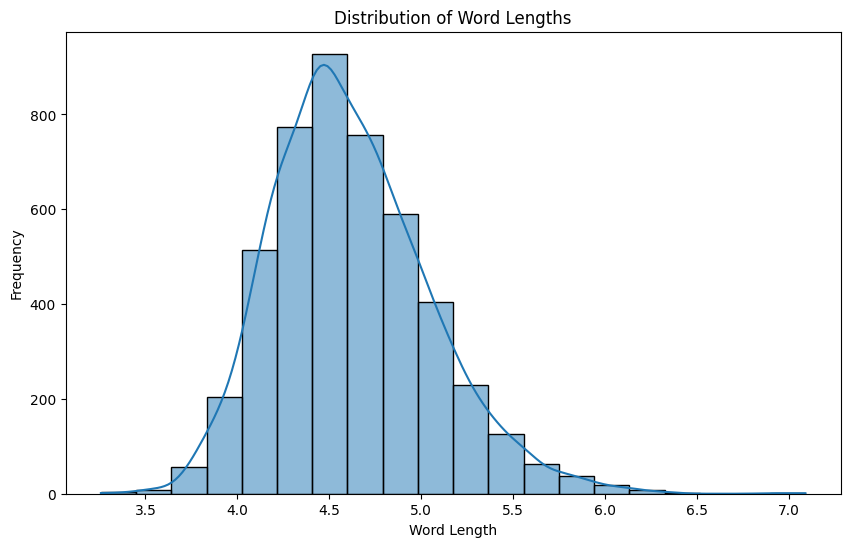

In [19]:
# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg Word Length'], bins=20, kde=True)
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()


### 2.1.4. Sentence Count (mean)

In [20]:
def calculate_average_sentence_count(row):
    sentence_count_columns = ['Sentence\nCount v1', 'Sentence\nCount v2']
    return row[sentence_count_columns].mean()

# new column
df['Average Sentence Count'] = df.apply(calculate_average_sentence_count, axis=1)
print(df[['Sentence\nCount v1', 'Sentence\nCount v2', 'Average Sentence Count']])


      Sentence\nCount v1  Sentence\nCount v2  Average Sentence Count
0                     11                  11                    11.0
1                     15                  15                    15.0
2                     11                  11                    11.0
3                      3                   3                     3.0
4                      5                   5                     5.0
...                  ...                 ...                     ...
4719                  17                  17                    17.0
4720                  17                  17                    17.0
4721                  17                  17                    17.0
4722                  12                  12                    12.0
4723                  13                  13                    13.0

[4724 rows x 3 columns]


## 2.2. Complexity Features

### 2.2.1. Average Syllables per Word

In [21]:
#pip install textstat # https://pypi.org/project/textstat/
#pip install -U spacy
import spacy  # For syntactic analysis


In [22]:
import textstat  # For readability indices
#df['Syllables_Per_Word'] = df['Excerpt'].apply(lambda x: [textstat.syllable_count(word) for word in x.split()])
df['Avg Syllables Per Word'] = df['Excerpt'].apply(lambda x: np.mean([textstat.syllable_count(word) for word in x.split()]))
df['Avg Syllables Per Word']


0       1.284916
1       1.331361
2       1.277108
3       1.226415
4       1.195122
          ...   
4719    1.208092
4720    1.280899
4721    1.309392
4722    1.340000
4723    1.486301
Name: Avg Syllables Per Word, Length: 4724, dtype: float64

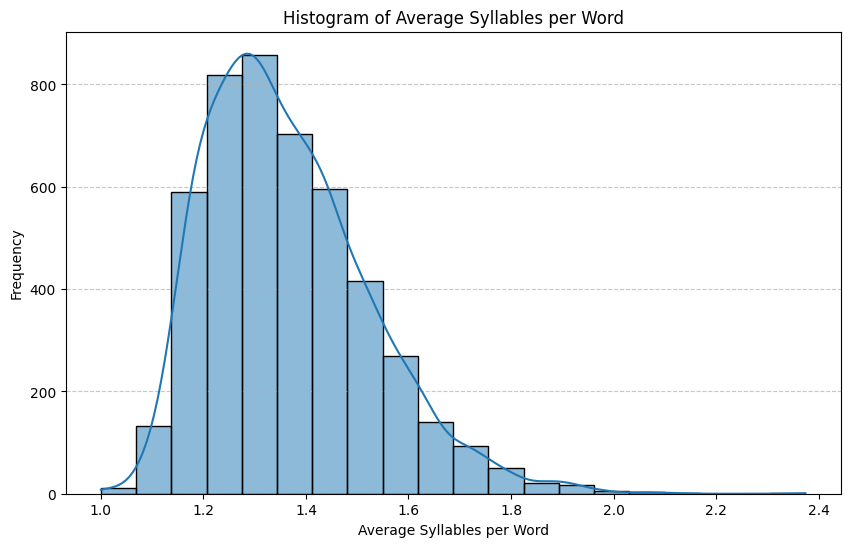

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg Syllables Per Word'], bins=20, kde=True)
plt.title('Histogram of Average Syllables per Word')
plt.xlabel('Average Syllables per Word')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 2.2.2. Average Vowels per Word

In [24]:
def count_vowels(word):
    vowels = set("AEIOUaeiou")
    return sum(1 for char in word if char in vowels)

# New columns:
df['Avg Vowel Count Per Word'] = df['Excerpt'].apply(lambda x: np.mean([count_vowels(word) for word in x.split()]) if x else 0)
df['Total Vowels Per Excerpt'] = df['Excerpt'].apply(lambda x: sum(count_vowels(word) for word in x.split()) if x else 0)
result_columns = df[['Avg Vowel Count Per Word', 'Total Vowels Per Excerpt']]
print(result_columns)


      Avg Vowel Count Per Word  Total Vowels Per Excerpt
0                     1.620112                       290
1                     1.603550                       271
2                     1.554217                       258
3                     1.534591                       244
4                     1.603659                       263
...                        ...                       ...
4719                  1.479769                       256
4720                  1.488764                       265
4721                  1.662983                       301
4722                  1.793333                       269
4723                  1.760274                       257

[4724 rows x 2 columns]


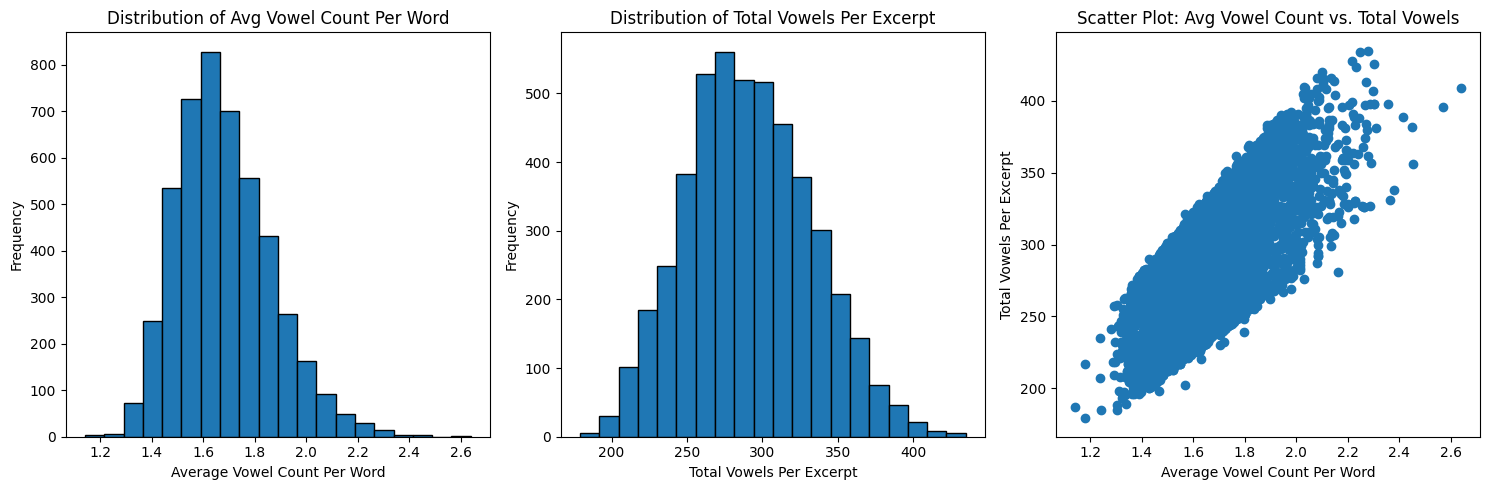

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Distribution of Average Vowel Count Per Word
axes[0].hist(df['Avg Vowel Count Per Word'], bins=20, edgecolor='black')
axes[0].set_xlabel('Average Vowel Count Per Word')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Avg Vowel Count Per Word')

# Plot 2: Distribution of Total Vowels Per Excerpt
axes[1].hist(df['Total Vowels Per Excerpt'], bins=20, edgecolor='black')
axes[1].set_xlabel('Total Vowels Per Excerpt')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Total Vowels Per Excerpt')

# Plot 3: Scatter Plot: Avg Vowel Count Per Word vs. Total Vowels Per Excerpt
axes[2].scatter(df['Avg Vowel Count Per Word'], df['Total Vowels Per Excerpt'])
axes[2].set_xlabel('Average Vowel Count Per Word')
axes[2].set_ylabel('Total Vowels Per Excerpt')
axes[2].set_title('Scatter Plot: Avg Vowel Count vs. Total Vowels')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


### 2.2.3. Punctuation Count

In [26]:
#import string -> look for !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~

def count_punctuation(excerpt):
    return sum(1 for char in excerpt if char in string.punctuation)

df['Punctuation Count'] = df['Excerpt'].apply(count_punctuation)

# Display the DataFrame with the new 'Punctuation Count' column
print(df[['Excerpt', 'Punctuation Count']])


                                                Excerpt  Punctuation Count
0     When the young people returned to the ballroom...                 27
1     All through dinner time, Mrs. Fayre was somewh...                 56
2     As Roger had predicted, the snow departed as q...                 47
3     Mr. Grimes was to come up next morning to Sir ...                 31
4     And outside before the palace a great garden w...                 33
...                                                 ...                ...
4719  The name Monarch means “king”. An adult Monarc...                 21
4720  Walking Sticks are long, thin, and slow-moving...                 36
4721  A Black Widow is a shiny black spider. It has ...                 32
4722  Solids are shapes that you can actually touch....                 32
4723  Animals are made of many cells. They eat thing...                 41

[4724 rows x 2 columns]


## 2.3. Frequency-Based Features

### 2.3.1. Word Frequency

In [39]:
# it takes 1-2min to run the cell
def count_word_frequency(excerpt):
    # Split the excerpt into words, convert to lowercase, and remove punctuation
    words = [word.lower().strip(string.punctuation) for word in excerpt.split()]
    # Remove empty strings resulting from punctuation stripping
    words = [word for word in words if word]
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Count the frequency of each word
    word_counts = Counter(words)
    return word_counts

# Apply the function to create word frequency features
df['Word Frequency'] = df['Excerpt'].apply(count_word_frequency)
print(df[['Excerpt', 'Word Frequency']])


                                                Excerpt  \
0     When the young people returned to the ballroom...   
1     All through dinner time, Mrs. Fayre was somewh...   
2     As Roger had predicted, the snow departed as q...   
3     Mr. Grimes was to come up next morning to Sir ...   
4     And outside before the palace a great garden w...   
...                                                 ...   
4719  The name Monarch means “king”. An adult Monarc...   
4720  Walking Sticks are long, thin, and slow-moving...   
4721  A Black Widow is a shiny black spider. It has ...   
4722  Solids are shapes that you can actually touch....   
4723  Animals are made of many cells. They eat thing...   

                                         Word Frequency  
0     {'young': 1, 'people': 1, 'returned': 1, 'ball...  
1     {'dinner': 1, 'time': 1, 'mrs': 2, 'fayre': 2,...  
2     {'roger': 4, 'predicted': 1, 'snow': 1, 'depar...  
3     {'mr': 1, 'grimes': 1, 'come': 2, 'next': 1, '...  
4

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x7f0f64b216c0>
Traceback (most recent call last):
  File "/home/patricia/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/nltk/data.py", line 1160, in __del__
    if not self.closed:
  File "/home/patricia/.pyenv/versions/3.10.6/envs/neuroCraft/lib/python3.10/site-packages/nltk/data.py", line 1180, in closed
    return self.stream.closed
AttributeError: 'SeekableUnicodeStreamReader' object has no attribute 'stream'


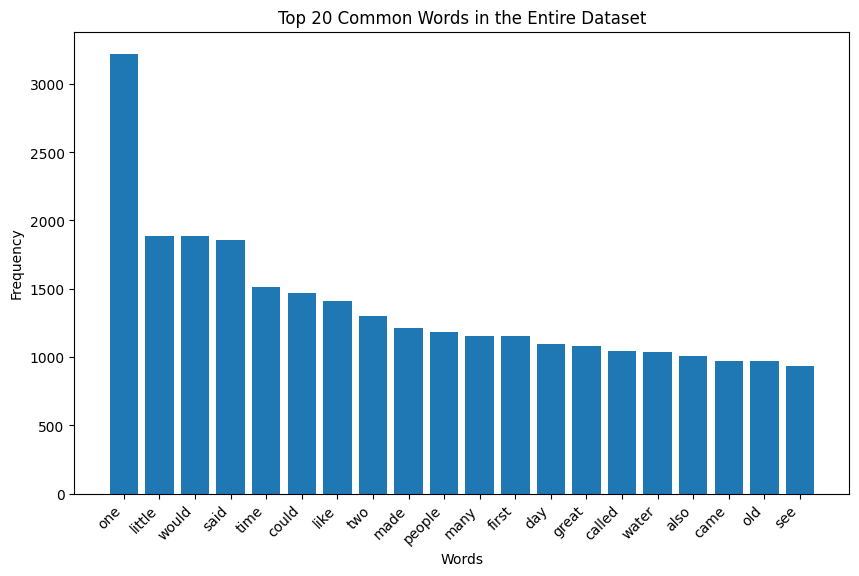

In [40]:
all_word_counts = Counter()
for word_counts in df['Word Frequency']:
    all_word_counts += word_counts

# Get the top 20 common words
top_words = all_word_counts.most_common(20)

# Plot the top 20 common words
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [count[1] for count in top_words])
plt.title('Top 20 Common Words in the Entire Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


### 2.3.2. Rare Words Count

In [43]:
def count_word_frequency(excerpt, frequency_threshold=1):
    # Split the excerpt into words, convert to lowercase, and remove punctuation
    words = [word.lower().strip(string.punctuation) for word in excerpt.split()]
    # Remove empty strings resulting from punctuation stripping
    words = [word for word in words if word]
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Count the frequency of each word
    word_counts = Counter(words)
    # Identify rare words based on the frequency threshold
    rare_words = {word: count for word, count in word_counts.items() if count <= frequency_threshold}
    return rare_words

# Create a column for rare words in each excerpt
df['Rare Words'] = df['Excerpt'].apply(count_word_frequency)
print(df[['Excerpt', 'Rare Words']])


                                                Excerpt  \
0     When the young people returned to the ballroom...   
1     All through dinner time, Mrs. Fayre was somewh...   
2     As Roger had predicted, the snow departed as q...   
3     Mr. Grimes was to come up next morning to Sir ...   
4     And outside before the palace a great garden w...   
...                                                 ...   
4719  The name Monarch means “king”. An adult Monarc...   
4720  Walking Sticks are long, thin, and slow-moving...   
4721  A Black Widow is a shiny black spider. It has ...   
4722  Solids are shapes that you can actually touch....   
4723  Animals are made of many cells. They eat thing...   

                                             Rare Words  
0     {'young': 1, 'people': 1, 'returned': 1, 'ball...  
1     {'dinner': 1, 'time': 1, 'somewhat': 1, 'silen...  
2     {'predicted': 1, 'snow': 1, 'departed': 1, 'qu...  
3     {'mr': 1, 'grimes': 1, 'next': 1, 'morning': 1...  
4

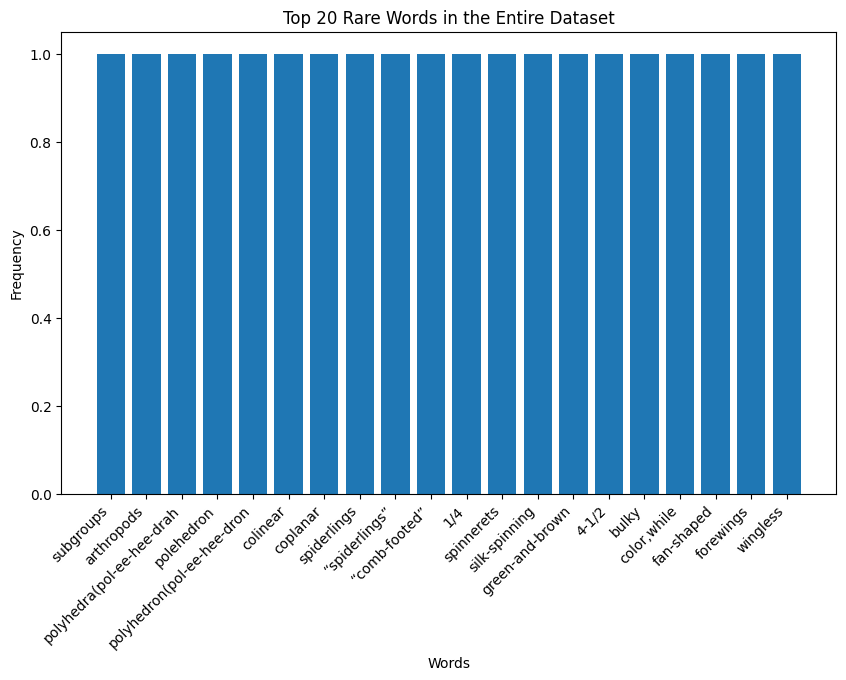

In [45]:
all_rare_word_counts = Counter()
for rare_word_counts in df['Rare Words']:
    all_rare_word_counts += rare_word_counts

# Get the least common 20 rare words
top_rare_words = all_rare_word_counts.most_common()[:-21:-1]

# Plot the least common 20 rare words
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_rare_words], [count[1] for count in top_rare_words])
plt.title('Top 20 Rare Words in the Entire Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


## 2.4. Structural Features

### 2.4.1. Paragraph Count

In [ ]:
df['Paragraphs']


0       6
1       6
2       5
3       1
4       2
       ..
4719    3
4720    3
4721    4
4722    3
4723    4
Name: Paragraphs, Length: 4724, dtype: int64

### 2.4.2. Average Characters per Sentence

In [47]:
import string
from nltk.tokenize import sent_tokenize

import nltk
nltk.download('stopwords')

def count_characters_per_sentence(excerpt):
    # Tokenize the text into sentences
    sentences = sent_tokenize(excerpt)

    # Count the number of characters in each sentence
    char_counts_per_sentence = [len(sentence) for sentence in sentences]

    return char_counts_per_sentence

# new column 'Characters Per Sentence'
df['Characters Per Sentence'] = df['Excerpt'].apply(count_characters_per_sentence)
df['Characters Per Sentence']


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/patricia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [92, 56, 128, 131, 108, 69, 67, 22, 142, 81, 86]
1       [120, 139, 125, 13, 45, 8, 17, 29, 89, 92, 104...
2         [154, 87, 91, 94, 159, 20, 53, 100, 37, 17, 86]
3                                         [157, 173, 516]
4                                [196, 130, 205, 60, 314]
                              ...                        
4719    [30, 52, 38, 60, 45, 45, 62, 47, 43, 49, 62, 6...
4720    [93, 36, 38, 72, 50, 56, 63, 64, 74, 102, 51, ...
4721    [38, 58, 76, 54, 109, 69, 61, 40, 48, 42, 33, ...
4722    [46, 79, 66, 51, 74, 64, 73, 60, 90, 40, 126, 84]
4723    [31, 39, 22, 102, 37, 63, 28, 63, 75, 87, 178,...
Name: Characters Per Sentence, Length: 4724, dtype: object

In [48]:
def avg_chars_per_sentence(row):
    # Sum of character counts in all sentences
    total_chars = sum(row['Characters Per Sentence'])

    # Sum of sentence counts from both columns
    total_sentences = row[['Sentence\nCount v1', 'Sentence\nCount v2']].mean()

    # Calculate average characters per sentence
    return total_chars / total_sentences if total_sentences > 0 else 0

# Apply the function to create the 'Avg Characters per Sentence' column
df['Avg Characters per Sentence'] = df.apply(avg_chars_per_sentence, axis=1)

# Display the resulting DataFrame
print(df[['Excerpt', 'Avg Characters per Sentence']])


                                                Excerpt  \
0     When the young people returned to the ballroom...   
1     All through dinner time, Mrs. Fayre was somewh...   
2     As Roger had predicted, the snow departed as q...   
3     Mr. Grimes was to come up next morning to Sir ...   
4     And outside before the palace a great garden w...   
...                                                 ...   
4719  The name Monarch means “king”. An adult Monarc...   
4720  Walking Sticks are long, thin, and slow-moving...   
4721  A Black Widow is a shiny black spider. It has ...   
4722  Solids are shapes that you can actually touch....   
4723  Animals are made of many cells. They eat thing...   

      Avg Characters per Sentence  
0                       89.272727  
1                       61.533333  
2                       81.636364  
3                      282.000000  
4                      181.000000  
...                           ...  
4719                    55.058824  
472

### 2.4.3. Number of Characters per excerpt

In [49]:
def count_char(excerpt):
    return len(excerpt)

# new column
df['Char Count'] = df['Excerpt'].apply(count_char)
print(df[['Excerpt', 'Char Count']])


                                                Excerpt  Char Count
0     When the young people returned to the ballroom...         992
1     All through dinner time, Mrs. Fayre was somewh...         937
2     As Roger had predicted, the snow departed as q...         908
3     Mr. Grimes was to come up next morning to Sir ...         848
4     And outside before the palace a great garden w...         909
...                                                 ...         ...
4719  The name Monarch means “king”. An adult Monarc...         952
4720  Walking Sticks are long, thin, and slow-moving...        1001
4721  A Black Widow is a shiny black spider. It has ...        1046
4722  Solids are shapes that you can actually touch....         864
4723  Animals are made of many cells. They eat thing...         885

[4724 rows x 2 columns]


### 2.4.4. Number of capital letters in each excerpt

In [50]:
def count_capital_chars(excerpt):
    count = 0
    for char in excerpt:
        if char.isupper():
            count += 1
    return count

# new column
df['Capital Char Count'] = df['Excerpt'].apply(count_capital_chars)
print(df[['Excerpt', 'Capital Char Count']])


                                                Excerpt  Capital Char Count
0     When the young people returned to the ballroom...                  16
1     All through dinner time, Mrs. Fayre was somewh...                  29
2     As Roger had predicted, the snow departed as q...                  30
3     Mr. Grimes was to come up next morning to Sir ...                  11
4     And outside before the palace a great garden w...                   8
...                                                 ...                 ...
4719  The name Monarch means “king”. An adult Monarc...                  22
4720  Walking Sticks are long, thin, and slow-moving...                  26
4721  A Black Widow is a shiny black spider. It has ...                  21
4722  Solids are shapes that you can actually touch....                  21
4723  Animals are made of many cells. They eat thing...                  13

[4724 rows x 2 columns]


### 2.4.5. Number of capital words per excerpt

In [51]:
def count_capital_words(excerpt):
    return sum(1 for word in excerpt.split() if word.isupper() and word.isalpha())

# new column
df['Capital Word Count'] = df['Excerpt'].apply(count_capital_words)

print(df[['Excerpt', 'Capital Word Count']])


                                                Excerpt  Capital Word Count
0     When the young people returned to the ballroom...                   0
1     All through dinner time, Mrs. Fayre was somewh...                   5
2     As Roger had predicted, the snow departed as q...                   2
3     Mr. Grimes was to come up next morning to Sir ...                   0
4     And outside before the palace a great garden w...                   0
...                                                 ...                 ...
4719  The name Monarch means “king”. An adult Monarc...                   0
4720  Walking Sticks are long, thin, and slow-moving...                   0
4721  A Black Widow is a shiny black spider. It has ...                   1
4722  Solids are shapes that you can actually touch....                   1
4723  Animals are made of many cells. They eat thing...                   0

[4724 rows x 2 columns]


In [ ]:
df['Excerpt'][1]


'All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.\nAt last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."\n"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?\nOh, I am so glad! Are you sure you\'re willing?"\n"I\'ve persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can\'t bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."\n"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.'

In [ ]:
text = df['Excerpt'][1]
capital_words = [word for word in text.split() if word.isupper()]

print(capital_words)


['I', '"I', 'I', 'I', 'I', 'I']


## 2.5. Metadata Features

### 2.5.1. Number of works by author

In [ ]:
def count_works_by_author(author, author_column):
    return author_column.apply(lambda x: sum(1 for a in x if a == author))

author_works_count = df.groupby('Author')['Author'].count().reset_index(name='Works Count')
print(author_works_count)


                                                 Author  Works Count
0                                       "Engineering"?             1
1                                        "Photo News."             1
2                                       "The Engineer"?            1
3                                                     ?          271
4     A British Surgeon, in The London Times, Dec. 2...            1
...                                                 ...          ...
2404  the following editorial article appeared early...            1
2405  the following official communication was teleg...            1
2406                                     thomas carlyle            3
2407                                         wikijunior           13
2408                                          wikipedia          274

[2409 rows x 2 columns]


In [ ]:
author_works_count = df['Author'].value_counts().reset_index()
author_works_count.columns = ['Author', 'Works Count']
print(author_works_count)


                                     Author  Works Count
0                               simple wiki          275
1                                 wikipedia          274
2                                         ?          271
3                             USHistory.org           28
4                           CommonLit Staff           16
...                                     ...          ...
2404                            Tessa Welch            1
2405                                 Sudhir            1
2406                  Sayed Ashique Mahmood            1
2407  Samantha Cutler, Thea Nicole de Klerk            1
2408             Austro-Hungarian statesman            1

[2409 rows x 2 columns]


## 2.6. Statistical Features

### 2.6.1. Standard Deviation of Word Length

In [ ]:
def word_length_std(excerpt):
    word_lengths = [len(word) for word in excerpt.split()]
    return np.std(word_lengths) if len(word_lengths) > 0 else 0

# New column 'Word Length Std'
df['Word Length Std'] = df['Excerpt'].apply(word_length_std)
df['Word Length Std']


0       2.227741
1       2.310028
2       2.197210
3       2.341397
4       2.147900
          ...   
4719    2.272272
4720    2.227923
4721    2.411525
4722    3.398856
4723    2.830019
Name: Word Length Std, Length: 4724, dtype: float64

### 2.6.2. Variability in sentence lengths

In [ ]:
def sentence_length_variation(row):
    sentence_lengths = count_characters_per_sentence(row['Excerpt'])
    return np.std(sentence_lengths)

df['Sentence Length Variation'] = df.apply(sentence_length_variation, axis=1)
df['Sentence Length Variation']


0        34.375178
1        45.797914
2        45.363727
3       165.591868
4        84.536383
           ...    
4719     15.489923
4720     19.731941
4721     20.925804
4722     22.009310
4723     40.490922
Name: Sentence Length Variation, Length: 4724, dtype: float64

## 2.7. Domain-Specific Features

In [ ]:
# Readibility Scores: we have readibility indices in the dataset


In [ ]:
# Analyse the sentiment of the text?


## 2.8. Temporal Features

### 2.8.1. Decade of Publication

In [52]:
# Convert 'Pub Year' to a categorical variable representing decades
df['Decade of Publication'] = pd.cut(df['Pub Year'], bins=range(1790, 2030, 10), labels=range(1790, 2030, 10)[:-1])

# new 'Decade of Publication' column
df[['Pub Year', 'Decade of Publication']].head()


Pub Year Decade of Publication
0    1914.0                  1910
1    1917.0                  1910
2    1917.0                  1910
3    1863.0                  1860
4    1889.0                  1880

In [53]:
df[['Decade of Publication']].value_counts()


Decade of Publication
2010                     1525
1910                      864
1880                      622
1870                      454
1900                      330
1890                      291
1920                      212
1850                       93
1860                       92
2000                       90
1840                       41
1940                       19
1830                       13
1810                       12
1990                       10
1950                        9
1960                        8
1930                        8
1980                        6
1970                        5
1790                        4
1820                        3
1800                        0
Name: count, dtype: int64

## 2.9. Interation Features

In [ ]:
# It migth be useful for some models:
def interaction_word_count_avg_word_length(row):
    return row['Avg Word Count'] * row['Avg Word Length']

df['Interaction Word Count Avg Word Length'] = df.apply(interaction_word_count_avg_word_length, axis=1)
df['Interaction Word Count Avg Word Length']


0       802.631285
1       791.751479
2       765.379518
3       692.169811
4       743.725610
           ...    
4719    775.491329
4720    819.370787
4721    858.823204
4722    710.233333
4723    732.397260
Name: Interaction Word Count Avg Word Length, Length: 4724, dtype: float64

## 2.10. Syntactic Complexity Features (NLP approach)

10. Syntactic Complexity Features:\
  10.1. Average Sentence Length: Longer sentences might be more complex.\
  10.2. Number of Clauses per Sentence: Counting the number of independent and dependent clauses.\
  10.3. Use of Subordinate Clauses: Identifying sentences with subordinate (dependent) clauses.\
  10.4. Variety of Sentence Structures: Analyzing the diversity of sentence structures.\
  10.5. Part-of-Speech (POS) Tagging: Understanding the distribution of different parts of speech in sentences.\
  10.6. Use of Complex Sentence Constructions: Identifying sentences with complex constructions.

### 2.10.1. Average Sentence Length

In [ ]:
def avg_sentence_length(row):
    total_word_count = row[['Joon\nWC v1', 'Google\nWC']].mean()
    sentence_count = row[['Sentence\nCount v1', 'Sentence\nCount v2']].mean()
    return total_word_count / sentence_count if sentence_count != 0 else 0
# new column 'Avg Sentence Length'
df['Avg Sentence Length'] = df.apply(avg_sentence_length, axis=1)
df['Avg Sentence Length']


0       16.045455
1       11.600000
2       15.545455
3       53.166667
4       32.700000
          ...    
4719    10.117647
4720    10.411765
4721    10.558824
4722    12.416667
4723    11.115385
Name: Avg Sentence Length, Length: 4724, dtype: float64

In [57]:
df['Excerpt'][3]


"Mr. Grimes was to come up next morning to Sir John Harthover's, at the Place, for his old chimney-sweep was gone to prison, and the chimneys wanted sweeping. And so he rode away, not giving Tom time to ask what the sweep had gone to prison for, which was a matter of interest to Tom, as he had been in prison once or twice himself. Moreover, the groom looked so very neat and clean, with his drab gaiters, drab breeches, drab jacket, snow-white tie with a smart pin in it, and clean round ruddy face, that Tom was offended and disgusted at his appearance, and considered him a stuck-up fellow, who gave himself airs because he wore smart clothes, and other people paid for them; and went behind the wall to fetch the half-brick after all; but did not, remembering that he had come in the way of business, and was, as it were, under a flag of truce."

In [63]:
count_characters_per_sentence("Mr. Grimes was to come up next morning to Sir John Harthover's, at the Place, for his old chimney-sweep was gone to prison, and the chimneys wanted sweeping.")


[157]

In [64]:
count_characters_per_sentence("And so he rode away, not giving Tom time to ask what the sweep had gone to prison for, which was a matter of interest to Tom, as he had been in prison once or twice himself.")


[173]

In [62]:
count_characters_per_sentence("Moreover, the groom looked so very neat and clean, with his drab gaiters, drab breeches, drab jacket, snow-white tie with a smart pin in it, and clean round ruddy face, that Tom was offended and disgusted at his appearance, and considered him a stuck-up fellow, who gave himself airs because he wore smart clothes, and other people paid for them; and went behind the wall to fetch the half-brick after all; but did not, remembering that he had come in the way of business, and was, as it were, under a flag of truce.")


[516]

### 2.10.2. Number of Clauses per sentence

In [73]:
#pip install spacy -> popular NLP library in Python
#python -m spacy download en_core_web_sm ->  English trained pipeline optimized for CPU = English language model
#import spacy
#nlp = spacy.load("en_core_web_sm") -> https://spacy.io/models/en


In [75]:
#IT TAKES 12min
# Function to calculate the number of clauses per sentence
def num_clauses_per_sentence_nlp(excerpt):
    # Parse the text using spaCy
    doc = nlp(excerpt)
    # Count the number of clauses (sentences) in the parsed document
    num_clauses = len(list(doc.sents))
    return num_clauses

# Function to identify sentences with subordinate clauses
def subordinate_clause(excerpt):
    # Parse the text using spaCy
    doc = nlp(excerpt)
    # Check if any sentence has a subordinate clause
    for sent in doc.sents:
        for token in sent:
            if "sub" in token.dep_:
                return True
    return False

# Function to analyze the diversity of sentence structures
def variety_of_sentence_structures(excerpt):
    # Parse the text using spaCy
    doc = nlp(excerpt)
    # Collect the unique syntactic structures of sentences
    sentence_structures = {sent.root.dep_ for sent in doc.sents}
    return len(sentence_structures)

# Function to perform POS tagging and count occurrences of each POS
def pos_distribution(excerpt):
    # Parse the text using spaCy
    doc = nlp(excerpt)
    # Count the occurrences of each POS
    pos_counts = Counter(token.pos_ for token in doc)
    return pos_counts

# Function to identify sentences with complex constructions
def complex_construction(excerpt):
    # Parse the text using spaCy
    doc = nlp(excerpt)
    # Check if any sentence has a conjunction or subordinating conjunction
    for sent in doc.sents:
        for token in sent:
            if token.dep_ in {"cc", "conj", "mark"}:
                return True
    return False

# Apply functions to create new columns
df['Num Clauses Per Sentence'] = df['Excerpt'].apply(num_clauses_per_sentence_nlp)
df['Subordinate Clause'] = df['Excerpt'].apply(subordinate_clause)
df['Variety of Sentence Structures'] = df['Excerpt'].apply(variety_of_sentence_structures)
df['POS Distribution'] = df['Excerpt'].apply(pos_distribution)
df['Complex Construction'] = df['Excerpt'].apply(complex_construction)


In [76]:
df['Num Clauses Per Sentence']


0       11
1       13
2       11
3        3
4        5
        ..
4719    17
4720    17
4721    17
4722    12
4723    13
Name: Num Clauses Per Sentence, Length: 4724, dtype: int64

In [77]:
df['Num Clauses Per Sentence'].value_counts()


Num Clauses Per Sentence
8     680
7     663
6     580
9     503
10    404
5     346
11    307
12    217
13    162
4     153
14    130
15     90
16     73
17     56
3      53
18     51
21     43
19     37
20     29
22     24
23     20
2      20
24     19
25     11
28      9
27      9
26      7
30      6
31      6
29      5
33      3
32      2
40      1
35      1
38      1
36      1
34      1
37      1
Name: count, dtype: int64

In [68]:
def num_clauses_per_sentence(row):
    # Use regular expression to identify sentence boundaries
    sentences = re.split(r'[.!?]', row['Excerpt'])
    # Filter out empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Calculate the number of clauses for each sentence
    num_clauses = len(sentences)

    # Return the total number of clauses
    return num_clauses

# Create a new column 'Num Clauses Per Sentence'
df['Num Clauses Per Sentence'] = df.apply(num_clauses_per_sentence, axis=1)
df['Num Clauses Per Sentence'].value_counts()


Num Clauses Per Sentence
8     632
7     586
9     521
6     495
10    443
11    336
5     278
12    243
13    216
14    146
15    119
4     118
16     96
17     84
18     73
20     46
3      40
21     38
19     34
22     31
23     27
24     24
2      17
25     17
27     12
31     11
26      9
30      8
28      7
35      3
29      3
33      2
39      2
32      2
41      1
40      1
36      1
38      1
37      1
Name: count, dtype: int64

### 2.10.3. Use of Subordinate Clauses

In [78]:
df['Subordinate Clause']


0       True
1       True
2       True
3       True
4       True
        ... 
4719    True
4720    True
4721    True
4722    True
4723    True
Name: Subordinate Clause, Length: 4724, dtype: bool

In [79]:
df['Subordinate Clause'].value_counts()


Subordinate Clause
True    4724
Name: count, dtype: int64

### 2.10.4. Variety of Sentence Structures

In [80]:
df['Variety of Sentence Structures']


0       1
1       1
2       1
3       1
4       1
       ..
4719    1
4720    1
4721    1
4722    1
4723    1
Name: Variety of Sentence Structures, Length: 4724, dtype: int64

In [81]:
df['Variety of Sentence Structures'].value_counts()


Variety of Sentence Structures
1    4723
2       1
Name: count, dtype: int64

### 2.10.5. Part-of-Speech (POS) Tagging: Understanding the distribution of different parts of speech in sentences

In [83]:
df['POS Distribution'][0]


Counter({'NOUN': 46,
         'DET': 30,
         'PUNCT': 27,
         'ADP': 22,
         'VERB': 20,
         'AUX': 16,
         'CCONJ': 11,
         'ADJ': 10,
         'PRON': 8,
         'ADV': 5,
         'SPACE': 5,
         'PROPN': 5,
         'NUM': 4,
         'PART': 3,
         'SCONJ': 1})

### 2.10.6. Use of Complex Sentence Constructions: Identifying sentences with complex constructions

In [84]:
df['Complex Construction']


0       True
1       True
2       True
3       True
4       True
        ... 
4719    True
4720    True
4721    True
4722    True
4723    True
Name: Complex Construction, Length: 4724, dtype: bool

In [85]:
df['Complex Construction'].value_counts()


Complex Construction
True     4720
False       4
Name: count, dtype: int64

In [87]:
print(df.loc[df['Complex Construction'] == False, 'Excerpt'])


1303    "Welcome back to school, everyone," says Mrs. ...
1329    Dog is in his house. Dog is sitting in his hou...
1464    Ape meets Crocodile by the lake. "Where do you...
1472    Some women come to the river. One woman has a ...
Name: Excerpt, dtype: object


In [88]:
df['Excerpt'][1303]


'"Welcome back to school, everyone," says Mrs. Clark with a big smile. Mrs. Clark asked each pupil to draw what they enjoyed most during the holiday. \nJohannes goes first. He draws what he enjoyed most from his holiday. \n"They are triangles," says Lydia. "They are huts," says Andile. \nJohannes finishes drawing. They are not triangles. They are not huts. \n"These are pyramids," explains Johannes. "Pyramids are the tombs used for Egyptian kings. My family visited Egypt." \nSibongile goes next. She draws what she enjoyed most from her holiday. \n"They are cows," says Suren.\n"They are buffaloes," says Mthobisi. \nSibongile finishes drawing. They are not cows. They are not buffaloes. \n"These are wildebeests," explains Sibongile. "Every year, thousands of wildebeests migrate from Kenya to Tanzania. My family visited Kenya." \nMarilize goes next. She is Johannes\' sister. \n"She will draw pyramids," says Jane. \n"She will draw Egyptian kings," says Kuda. \nMarilize finishes drawing. They

In [ ]:
df[['Excerpt', 'Num Clauses Per Sentence', 'Subordinate Clause', 'Variety of Sentence Structures', 'POS Distribution', 'Complex Construction']]


## 2.11. Lexical diversity

In [94]:
#https://pypi.org/project/lexical-diversity/
#pip install lexical-diversity
from lexical_diversity import lex_div as ld


In [97]:
#pip install lexicalrichness
from lexicalrichness import LexicalRichness


mtld: Measure of Lexical Diversity (McCarthy 2005, McCarthy and Jarvis 2010)

In [100]:
def mtld(excerpt):
    lex = LexicalRichness(excerpt)
    return lex.mtld()

df['mtld'] = df['Excerpt'].apply(mtld)
df['mtld']


0        55.795609
1       100.348996
2       103.460159
3        90.775131
4        64.062500
           ...    
4719     46.834936
4720     64.543969
4721     78.174529
4722     35.268484
4723     58.314357
Name: mtld, Length: 4724, dtype: float64

In [ ]:


df['Lexical Diversity'] = df['Excerpt'].apply(lambda x: ld.ttr(ld.flemmatize(" ".join(x.split()))))

# Display the DataFrame with the new 'Lexical Diversity' column
print(df[['Excerpt', 'Lexical Diversity']])


                                                Excerpt  Lexical Diversity
0     When the young people returned to the ballroom...           0.547486
1     All through dinner time, Mrs. Fayre was somewh...           0.656805
2     As Roger had predicted, the snow departed as q...           0.668675
3     Mr. Grimes was to come up next morning to Sir ...           0.610063
4     And outside before the palace a great garden w...           0.652439
...                                                 ...                ...
4719  The name Monarch means “king”. An adult Monarc...           0.473988
4720  Walking Sticks are long, thin, and slow-moving...           0.544944
4721  A Black Widow is a shiny black spider. It has ...           0.552486
4722  Solids are shapes that you can actually touch....           0.586667
4723  Animals are made of many cells. They eat thing...           0.589041

[4724 rows x 2 columns]


In [91]:
text = df['Excerpt'][0]

# Calculate TTR (Type-Token Ratio) - a measure of lexical diversity
ttr = ld.ttr(text)

# Calculate MTLD (Measure of Textual Lexical Diversity)
mtld = ld.mtld(text)

# Print the results
print(f"TTR (Type-Token Ratio): {ttr}")
print(f"MTLD (Measure of Textual Lexical Diversity): {mtld}")


TTR (Type-Token Ratio): 0.036290322580645164
MTLD (Measure of Textual Lexical Diversity): 14.343354252793834


## 2.11. Morphological Features